<a href="https://colab.research.google.com/github/joaocosentino/asl-ml-immersion/blob/master/Projeto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Projeto Final - Mapeamento de Dados em Estruturas de Árvores**


### **Metodologia**

A ideia do projeto é realizar o comparativo com relação ao desempenho de dois tipos de dados abstratos não lineares: **Árvores Binárias de Busca** e **Árvores AVL**.Abaixo temos algum dos métodos utilizados para medir a diferença de desempenho entre as duas:
1. Criação da Árvore
2. Busca por Elemento
3. Inserção de Elemento
4. Remoção de Elemento

A análise de cada um deles será feita através da aplicação de um dataset que contem transações bancárias de contas da Europa no ano de 2023. O data set possui mais de 550.000 registros anonimizados. Porém devido ao uso do Google Colab o dataset foi restringido a aproximadamente 110.000 registros.



> Para avaliar o desempenho utilizando os métodos citados acima, a massa de dados foi dividida em 3 tamanhos diferentes e nas seguintes combinações:


*    Busca, Inserção e remoção com massas de dados de 500, 2.500 e 10.000 registros bancários
*    Cada método foi testado com massas em **ordem crescente, decrescente e randomizada**






Para realizar o experimento, será utiliazda a linguagem de programação ***Python***, que é uma linguagem de alto nível de abstração interpretada por script. A ferramenta escolhida como ambiente de desenvolvimento foi o ***Google Colab***, que se utiliza da estrutura do ***Jupyter Notebooks*** uma das ferramentas mais completas e que permite a utilização de diversas bibliotecas python para ***Data Science***.
Assim como a linguagem de programação e o ambiente de desenvolvimento, as características da máquina onde serão executados os algoritimos é de extrema relevância na avaliação e comparação de performance. A seguir estão as características físicas e de software (**Sistema Operacional**) utilizados no projeto:
* Procesasdor: **12th Gen Intel(R) Core(TM) i7-12700H   2.70 GHz**
* Memória RAM: **16GB DDR5 4800MHz**
* Armazenamento: **1TB SSD M.2 2280 PCIe Gen4 TLC**
* Sistema Operacional: **Windows 11 Home**

###Imports das Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import plotly
from google.colab import files
import io
import re
import sys
import resource
import os
import time
import sweetviz as sv
from IPython.display import display
from PIL import Image
import random

## Aumentando Limite Recursivo

In [ ]:
sys.setrecursionlimit(10000000)
memory_limit = 12*1024*1024*1024
resource.setrlimit(resource.RLIMIT_DATA,(memory_limit,memory_limit))

## Leitura da base de dados

In [ ]:
upload = files.upload()


Saving Busca.jpg to Busca (1).jpg
Saving Inserção.jpg to Inserção (1).jpg
Saving Remoções.jpg to Remoções (1).jpg


In [ ]:
df_base = pd.read_csv('creditcard.csv')
df_base.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [ ]:
df = df_base.drop(df_base.index[5000:])
num_rows, num_columns = df.shape

# Now, num_rows and num_columns contain the number of rows and columns in the merged_data DataFrame
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 5000
Number of columns: 31


## Árvore Binária de Busca

In [ ]:
class BinarySearchTreeNode:
    def __init__(self, data,df):
        self.data = data
        self.left = None
        self.right = None
        self.df = df


class BinarySearchTree:
    def __init__(self):
      self.root =  None

    def insert_data_frame(self, key, data_frame):
        self.root = self._insert(self.root, key,data_frame)


    def _insert(self, node, data,data_frame):
        if node is None:
            return BinarySearchTreeNode(data,data_frame)

        if data < node.data:
            node.left = self._insert(node.left, data,data_frame)
        else:
            node.right = self._insert(node.right, data,data_frame)

        return node



    def search(self, data):
        return self._search(self.root, data)

    def _search(self, node, data):
        if node is None:
            return False
        if data == node.data:
            return True
        elif data < node.data:
            return self._search(node.left, data)
        else:
            return self._search(node.right, data)


    def inorder_traversal(self):
        result = []
        self._inorder(self.root, result)
        return result

    def _inorder(self, node, result):
        if node:
            self._inorder(node.left, result)
            result.append(node.data)
            self._inorder(node.right, result)

    def delete(self, data):
        self.root = self._delete(self.root, data)

    def _delete(self, root, data):
        if root is None:
            return root

        if data < root.data:
            root.left = self._delete(root.left, data)
        elif data > root.data:
            root.right = self._delete(root.right, data)
        else:
            # Node with the key to be deleted found

            # Case 1: Node with only one child or no child
            if root.left is None:
                return root.right
            elif root.right is None:
                return root.left

            # Case 2: Node with two children
            # Get the inorder successor (smallest in the right subtree)
            temp = self._get_min_value_node(root.right)
            # Copy the inorder successor's content to this node
            root.data = temp.data
            root.df = temp.df
            # Delete the inorder successor
            root.right = self._delete(root.right, temp.data)

        return root


    def find_max(self,root):
        if self.right is None:
            return self.data
        return self.right.find_max()

    def _get_min_value_node(self, root):
        current = root
        while current.left is not None:
            current = current.left
        return current

## Árvore Balanceada - AVL

In [ ]:
class AVLNode:
    def __init__(self, key,df):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1
        self.data_frame = df

class AVLTree:
    def __init__(self):
        self.root = None

    def _height(self, node):
        if node is None:
            return 0
        return node.height

    def _update_height(self, node):
        if node:
            node.height = 1 + max(self._height(node.left), self._height(node.right))

    def _balance_factor(self, node):
        if node is None:
            return 0
        return self._height(node.left) - self._height(node.right)

    def _rotate_left(self, node):
        right_child = node.right
        node.right = right_child.left
        right_child.left = node
        self._update_height(node)
        self._update_height(right_child)
        return right_child

    def _rotate_right(self, node):
        left_child = node.left
        node.left = left_child.right
        left_child.right = node
        self._update_height(node)
        self._update_height(left_child)
        return left_child

    def insert(self, key):
        self.root = self._insert(self.root, key)

    def _insert(self, node, key, data_frame):
        if node is None:
            return AVLNode(key, data_frame)

        if key < node.key:
            node.left = self._insert(node.left, key, data_frame)
        else:
            node.right = self._insert(node.right, key, data_frame)

        self._update_height(node)

        # Verifique o fator de balanceamento e faça as rotações, se necessário
        balance = self._balance_factor(node)

        if balance > 1:
            if key < node.left.key:
                return self._rotate_right(node)
            else:
                node.left = self._rotate_left(node.left)
                return self._rotate_right(node)
        if balance < -1:
            if key > node.right.key:
                return self._rotate_left(node)
            else:
                node.right = self._rotate_right(node.right)
                return self._rotate_left(node)

        return node

    def insert_data_frame(self, key, data_frame):
        self.root = self._insert(self.root, key, data_frame)


    def delete(self, key):
        self.root = self._delete(self.root, key)

    def _delete(self, node, key):
        if node is None:
            return node

        if key < node.key:
            node.left = self._delete(node.left, key)
        elif key > node.key:
            node.right = self._delete(node.right, key)
        else:
            if node.left is None:
                return node.right
            elif node.right is None:
                return node.left

            min_key = self._find_min(node.right).key
            node.key = min_key
            node.right = self._delete(node.right, min_key)

        self._update_height(node)

        balance = self._balance_factor(node)

        if balance > 1:
            if self._balance_factor(node.left) >= 0:
                return self._rotate_right(node)
            else:
                node.left = self._rotate_left(node.left)
                return self._rotate_right(node)
        if balance < -1:
            if self._balance_factor(node.right) <= 0:
                return self._rotate_left(node)
            else:
                node.right = self._rotate_right(node.right)
                return self._rotate_left(node)

        return node

    def _find_min(self, node):
        while node.left:
            node = node.left
        return node

    def search(self, key):
        return self._search(self.root, key)

    def _search(self, node, key):
        if node is None:
            return False
        if key == node.key:
            return True
        elif key < node.key:
            return self._search(node.left, key)
        else:
            return self._search(node.right, key)

    def inorder_traversal(self):
        result = []
        self._inorder(self.root, result)
        return result

    def _inorder(self, node, result):
        if node:
            self._inorder(node.left, result)
            result.append(node.key)
            self._inorder(node.right, result)

## Mapeando o DataFrame para estrutura de Árvore

In [ ]:
def build_tree(df):

  bst = BinarySearchTree()
  for index, row in df.iterrows():
      key = row["id"]
      data = row.to_dict()
      bst.insert_data_frame(key,data)
  return bst
# Construir a BST a partir do DataFrame
root_bst = build_tree(df)

In [ ]:
def build_tree_avl(df):

  avl = AVLTree()
  for index, row in df.iterrows():
      key = row["id"]
      data = row.to_dict()
      avl.insert_data_frame(key,data)
  return avl
# Construir a AVL a partir do DataFrame
root_avl = build_tree_avl(df)

## **Desempenho das Árvores**

### **Inserção de Elementos**

#### **Inserção Ordenada Crescente**

**Vale o destaque para esse tipo de inserção que realça bem o problema com a falta de balanceamento da BST**

> Nesse tipo de inserção a árvore se torna uma lista ligada, o que transforma a complexidade de tempo a se tornar linear: ***O(n)***. Com isso sua performance se torna pior em todos os métodos aplicados, Busca, Inserção e Remoção.




#### Árvore Binária de Busca

In [ ]:
def insert_bst(bst,element,st=None,end=None):
  start = time.process_time()
  #for element in elements:
  if len(element) > 1:
    for index,row in df_base[st:end].iterrows():
      key = row[0]
      data = row.to_dict()
      bst.insert_data_frame(key,data)
  else:
      key = element['id']
      data = element.to_dict()
      bst.insert_data_frame(key,data)
  end = time.process_time()
  return round(end-start,4)

tempo_insert_bst_500 = insert_bst(root_bst,df_base,17000,17500)

In [ ]:
tempo_insert_bst_2500 = insert_bst(root_bst,df_base,17500,20000)

In [ ]:
tempo_insert_bst_10k = insert_bst(root_bst,df_base,5000,15000)

#### Árvore AVL

In [ ]:
def insert_avl(avl,element,st=None,end=None):
  start = time.process_time()

  if len(element) > 1:
    for index,row in df_base[st:end].iterrows():
      key = row[0]
      data = row.to_dict()
      avl.insert_data_frame(key,data)
  else:

    key = element['id']
    data = element.to_dict()
    avl.insert_data_frame(key,data)
  end = time.process_time()
  return round(end-start,4)

tempo_insert_avl_500 = insert_avl(root_avl,df_base,17000,17500)
tempo_insert_avl_2500 = insert_avl(root_avl,df_base,17500,20000)
tempo_insert_avl_10k = insert_avl(root_avl,df_base,5000,15000)

### **Inserção Randomizada**



> Nesta seção daus novas árvores serão criadas, e dessa vez a inserção de novos nós será feita inicialemnte randomicamente. Assim o desempenho dos próximos métodos não será prejudicado pelo problema criado propositalmente na primeira BST


#### Árvore Binária de Busca

In [ ]:
def insert_bst_random(bst,element):
  items = random.sample(range(len(df_base)),element)
  start = time.process_time()

  if element > 1:
    for item in items:
      key = df_base.iloc[item]['id']
      data = df_base.iloc[item].to_dict()
      bst.insert_data_frame(key,data)
  else:

    key = df_base.iloc[element]['id']
    data = df_base.iloc[element].to_dict()
    bst.insert_data_frame(key,data)
  end = time.process_time()
  return round(end-start,4)

bst2 = BinarySearchTree()
tempo_insert_bst_5k_random = insert_bst_random(bst2,5000)
tempo_insert_bst_25k_random = insert_bst_random(bst2,25000)
tempo_insert_bst_50k_random = insert_bst_random(bst2,50000)

ValueError: ignored

#### Árvore AVL

In [ ]:
def insert_avl_random(avl,element):
  items = random.sample(range(len(df_base)),element)
  start = time.process_time()

  if element > 1:
    for item in items:
      key = df_base.iloc[item]['id']
      data = df_base.iloc[item].to_dict()
      avl.insert_data_frame(key,data)
  else:

    key = df_base.iloc[element]['id']
    data = df_base.iloc[element].to_dict()
    avl.insert_data_frame(key,data)
  end = time.process_time()
  return round(end-start,4)

avl2 = AVLTree()
tempo_insert_avl_5k_random = insert_avl_random(avl2,5000)
tempo_insert_avl_25k_random = insert_avl_random(avl2,25000)
tempo_insert_avl_50k_random = insert_avl_random(avl2,50000)

### **Inserção Ordenada decrescente**

Árvore Binária de Busca

In [ ]:
def insert_bst_dec(bst,element,st=None,end=None):
  start = time.process_time()
  #for element in elements:
  if len(element) > 1:
    for index,row in df_base[st:end].iterrows():
      key = row[0]
      data = row.to_dict()
      bst.insert_data_frame(key,data)
  else:
      key = element['id']
      data = element.to_dict()
      bst.insert_data_frame(key,data)
  end = time.process_time()
  return round(end-start,4)

tempo_insert_bst_500_dec = insert_bst_dec(bst2,df_base,40000,35000)

In [ ]:
tempo_insert_bst_2500_dec = insert_bst_dec(bst2,df_base,50000,40000)

In [ ]:
tempo_insert_bst_5000_dec = insert_bst_dec(bst2,df_base,100000,50000)

#### Árvore AVL

In [ ]:
def insert_avl(avl,element,st=None,end=None):
  start = time.process_time()

  if len(element) > 1:
    for index,row in df_base[st:end].iterrows():
      key = row[0]
      data = row.to_dict()
      avl.insert_data_frame(key,data)
  else:

    key = element['id']
    data = element.to_dict()
    avl.insert_data_frame(key,data)
  end = time.process_time()
  return round(end-start,4)

tempo_insert_avl_500_dec = insert_avl(avl2,df_base,40000,35000)
tempo_insert_avl_2500_dec = insert_avl(avl2,df_base,50000,40000)
tempo_insert_avl_5k_dec = insert_avl(avl2,df_base,100000,50000)

### **Busca de Elemento**

Para busca de elementos nas Árvores a complexidade de tempo é O(log(n)), onde 'n' é o número de elementos a serem buscados. Devido a esse fato, não faz diferença se a busca é feita de forma ordenada crescente ou decrescente ou ainda randomizada.
  ***Desde que para a BST, a árvore tenha sido gerada de forma aleatória e não em ordem crescente o que tornaria o problema O(n) afetando bastante o desempenho para qualquer método nesta árvore.***

#### Árvore Binária de Busca

In [ ]:
def search_bst(bst,element,st=None,end=None):
  start = time.process_time()
  if len(element) > 1:
    for index,row in df_base[st:end].iterrows():
      root_bst.search(row[0])
  end = time.process_time()
  return round(end-start,4)

tempo_search_bst_500 = search_bst(root_bst,df_base,4500,5000)
tempo_search_bst_2500 = search_bst(root_bst,df_base,2500,5000)
tempo_search_bst_5k = search_bst(root_bst,df_base,0,10000)

#### Árvore AVL

In [ ]:
def search_avl(avl,element,st=None,end=None):
  start = time.process_time()
  if len(element) > 1:
    for index,row in df_base[st:end].iterrows():
      root_avl.search(row[0])
  end = time.process_time()
  return round(end-start,4)
tempo_search_avl_500 = search_avl(root_avl,df_base,4500,5000)
tempo_search_avl_2500 = search_avl(root_avl,df_base,2500,5000)
tempo_search_avl_5k = search_avl(root_avl,df_base,0,10000)

###**Aplicação dos métodos nas árvores que não se tornaram listas ligadas**

### Busca Aleatória

####Árvore Binaria de Busca

In [ ]:
def search_bst_random(bst,element):
  items = random.sample(range(len(df_base)),element)
  start = time.process_time()

  if element > 1:
    for item in items:
      key = df_base.iloc[item]['id']
      bst.search(key)
  else:
    key = df_base.iloc[element]['id']
    bst.search(key)
  end = time.process_time()
  return round(end-start,4)

tempo_search_bst_5k_random = search_bst_random(bst2,5000)
tempo_search_bst_25k_random = search_bst_random(bst2,25000)
tempo_search_bst_50k_random = search_bst_random(bst2,50000)

####Árvore AVL

In [ ]:
def search_avl_random(avl,element):
  items = random.sample(range(len(df_base)),element)
  start = time.process_time()

  if element > 1:
    for item in items:
      key = df_base.iloc[item]['id']
      avl.search(key)
  else:
    key = df_base.iloc[element]['id']
    avl.search(key)
  end = time.process_time()
  return round(end-start,4)

tempo_search_avl_5k_random = search_avl_random(avl,5000)
tempo_search_avl_25k_random = search_avl_random(avl,25000)
tempo_search_avl_50k_random = search_avl_random(avl,50000)

### **Remoção de Elementos**

#### **Remoção Ordenada Crescente**

### Árvore Binária de Busca

In [ ]:
def delete_bst(bst,element,st=None,end=None):
  start = time.process_time()
  if len(element) > 1:
    for index,row in df_base[st:end].iterrows():
      key = row[0]
      data = row.to_dict()
      bst.delete(key)
  else:
    key = element['id']
    bst.delete(key)
  end = time.process_time()
  return round(end-start,4)

tempo_delete_bst_500 = delete_bst(root_bst,df_base,2000,2500)
tempo_delete_bst_2500 = delete_bst(root_bst,df_base,2500,5000)
tempo_delete_bst_5k = delete_bst(root_bst,df_base,5000,15000)

### Árvore AVL

In [ ]:
def delete_avl(avl,element,st=None,end=None):
  start = time.process_time()
  if len(element) > 1:
    for index,row in df_base[st:end].iterrows():
      key = row[0]
      avl.delete(key)
  else:
    key = element['id']
    avl.delete(key)
  end = time.process_time()
  return round(end-start,4)

tempo_delete_avl_500 = delete_avl(root_avl,df_base,2000,2500)
tempo_delete_avl_2500 = delete_avl(root_avl,df_base,2500,5000)
tempo_delete_avl_5k = delete_avl(root_avl,df_base,5000,15000)

#### **Remoção Ordenada Decrescente**

### Árvore Binária de Busca

In [ ]:
def delete_bst(bst,element,st=None,end=None):
  start = time.process_time()
  if len(element) > 1:
    for index,row in df_base[st:end].iterrows():
      key = row[0]
      data = row.to_dict()
      bst.delete(key)
  else:
    key = element['id']
    bst.delete(key)
  end = time.process_time()
  return round(end-start,4)

tempo_delete_bst_500_dec = delete_bst(root_bst,df_base,33000,32500)
tempo_delete_bst_2500_dec = delete_bst(root_bst,df_base,32500,30000)
tempo_delete_bst_5000_dec = delete_bst(root_bst,df_base,35000,25000)

### Árvore AVL

In [ ]:
def delete_avl(avl,element,st=None,end=None):
  start = time.process_time()
  if len(element) > 1:
    for index,row in df_base[st:end].iterrows():
      key = row[0]
      avl.delete(key)
  else:
    key = element['id']
    avl.delete(key)
  end = time.process_time()
  return round(end-start,4)

tempo_delete_avl_500_dec = delete_avl(root_avl,df_base,33000,32500)
tempo_delete_avl_2500_dec = delete_avl(root_avl,df_base,32500,30000)
tempo_delete_avl_5k_dec = delete_avl(root_avl,df_base,35000,25000)

#### **Remoção Randomizada**

In [ ]:
def delete_bst_random(bst,element):
  items = random.sample(range(len(df_base)),element)
  start = time.process_time()

  if element > 1:
    for item in items:
      key = df_base.iloc[item]['id']
      data = df_base.iloc[item].to_dict()
      bst.delete(key)
  else:

    key = df_base.iloc[element]['id']
    data = df_base.iloc[item].to_dict()
    bst.delete(key)
  end = time.process_time()
  return round(end-start,4)


tempo_delete_bst_500_random = delete_bst_random(root_bst,500)
tempo_delete_bst_2500_random = delete_bst_random(root_bst,2500)
tempo_delete_bst_10k_random = delete_bst_random(root_bst,10000)

In [ ]:
def delete_avl_random(avl,element):
  items = random.sample(range(len(df_base)),element)
  start = time.process_time()

  if element > 1:
    for item in items:
      key = df_base.iloc[item]['id']
      data = df_base.iloc[item].to_dict()
      avl.delete(key)
  else:

    key = df_base.iloc[element]['id']
    data = df_base.iloc[item].to_dict()
    avl.delete(key,data)
  end = time.process_time()
  return round(end-start,4)


tempo_delete_avl_500_random = delete_avl_random(root_avl,500)
tempo_delete_avl_2500_random = delete_avl_random(root_avl,2500)
tempo_delete_avl_10k_random = delete_avl_random(root_avl,10000)

## **Visualização de Desempenho**


## Pandas Dataframe

In [ ]:
data_dict = {
    'Busca_crescente_bst':[tempo_search_bst_500,tempo_search_bst_2500,tempo_search_bst_5k],
    'Busca_crescente_avl':[tempo_search_avl_500, tempo_search_avl_2500,tempo_search_avl_5k ],
    'Inserção_crescente_bst':[tempo_insert_bst_500,tempo_insert_bst_2500,tempo_insert_bst_10k],
    'Inserção_crescente_avl':[tempo_insert_avl_500,tempo_insert_avl_2500,tempo_insert_avl_10k],
    'Inserção_decrescente_bst':[tempo_insert_bst_500_dec,tempo_insert_bst_2500_dec,tempo_insert_bst_5000_dec,],
    'Inserção_decrescente_avl':[tempo_insert_avl_500_dec,tempo_insert_avl_2500_dec,tempo_insert_avl_5k_dec],
    'Inserção_randomizada_bst':[tempo_insert_bst_500_random, tempo_insert_bst_2500_random,tempo_insert_bst_10k_random],
    'Inserção_randomizada_avl':[0, 0,tempo_insert_avl_10k_random],
    'Remoção_bst_crescente':[tempo_delete_bst_500,tempo_delete_bst_2500,tempo_delete_bst_5k],
    'Remoção_avl_crescente':[tempo_delete_avl_500,tempo_delete_avl_2500,tempo_delete_avl_5k],
    'Remoção_bst_derescente':[tempo_delete_bst_500_dec,tempo_delete_bst_2500_dec,tempo_delete_bst_5000_dec],
    'Remoção_avl_decrescente':[tempo_delete_avl_500_dec,tempo_delete_avl_2500_dec,tempo_delete_avl_5k_dec],
    'Remoção_bst_randomizada':[tempo_delete_bst_500_random,tempo_delete_bst_2500_random,tempo_delete_bst_10k_random],
    'Remoção_avl_randomizada':[tempo_delete_avl_500_random,tempo_delete_avl_2500_random,tempo_delete_avl_10k_random],

}
df_final = pd.DataFrame(data_dict,index=['500','2.5k','10k'])

In [ ]:
df_final

,Busca_crescente_bst,Busca_crescente_avl,Inserção_crescente_bst,Inserção_crescente_avl,Inserção_decrescente_bst,Inserção_decrescente_avl,Inserção_randomizada_bst,Inserção_randomizada_avl,Remoção_bst_crescente,Remoção_avl_crescente,Remoção_bst_derescente,Remoção_avl_decrescente,Remoção_bst_randomizada,Remoção_avl_randomizada
500,0.6357,0.0165,0.5985,0.0387,0.0012,0.0005,1.7211,0.0000,0.2869,0.0411,0.0006,0.0017,1.1881,0.0982
2.5k,2.1799,0.0729,6.1767,0.1607,0.0010,0.0002,8.9900,0.0000,1.7929,0.1146,0.0003,0.0003,4.9165,0.4596
10k,15.6397,0.2931,51.9076,0.9209,0.0005,0.0001,35.9757,1.9734,8.1268,0.4220,0.0002,0.0002,17.4000,1.9732


In [ ]:
df_final.to_excel("time_result.xlsx",sheet_name='results')

## Comparação na Busca

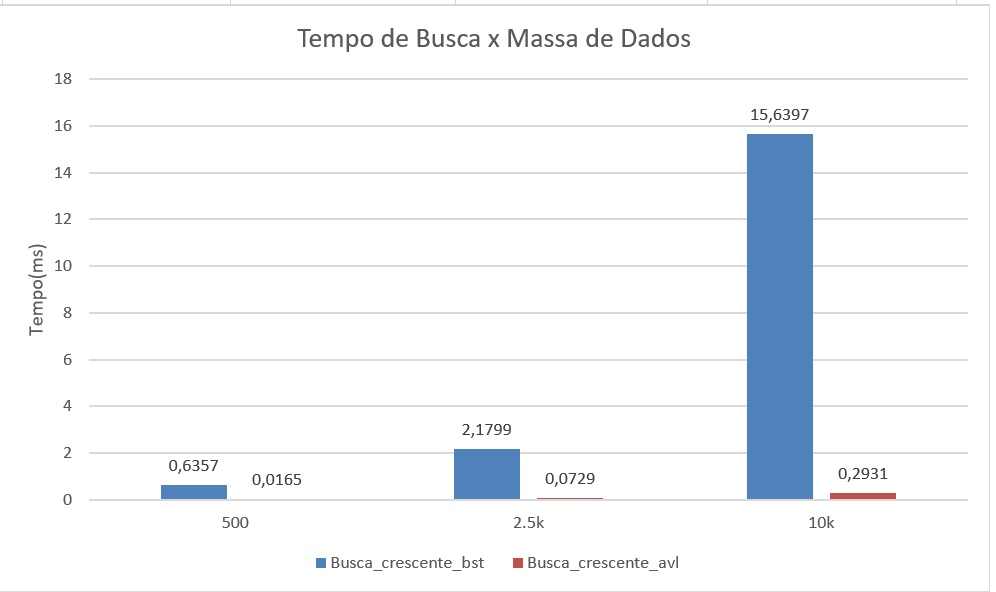

In [ ]:
display(Image.open("Busca (1).jpg"))

## Comparação ao Inserir

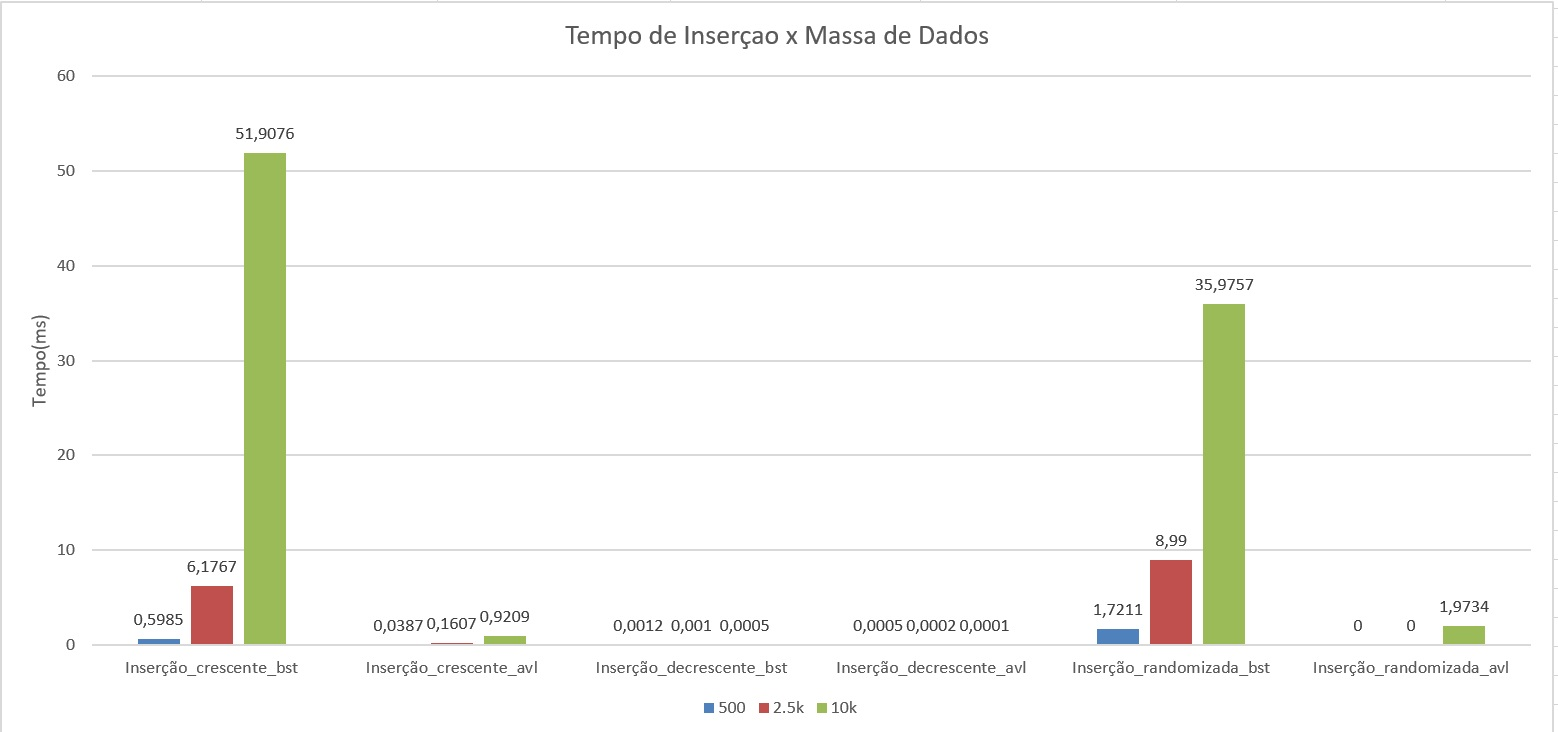

In [ ]:
display(Image.open("Inserção (1).jpg"))

## Comparação ao Remover

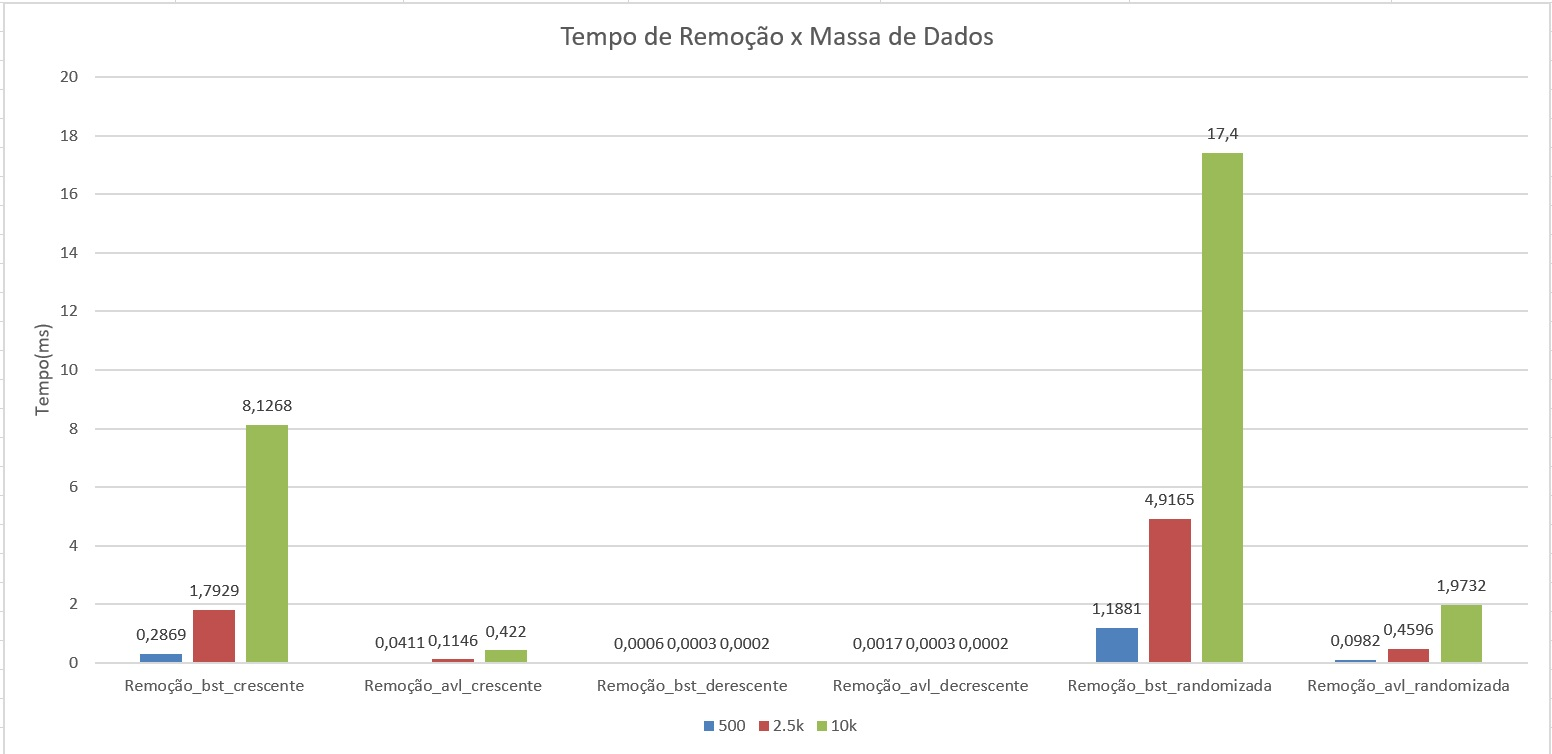

In [ ]:
display(Image.open("Remoções (1).jpg"))